# Financial Time Series

## Financial Data

### Data Import

In [1]:
!pip install -U finance-datareader
!pip install pandas-datareader
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 1.1 MB/s eta 0:00:00


In [2]:
import FinanceDataReader as fdr
import yfinance as yf
import seaborn as sns
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('fivethirtyeight')
# plt.style.use('classic')
# plt.style.use('ggplot')
from pylab import mpl, plt
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline
from datetime import datetime

In [3]:
# Set the start and end date
start_date = '2000-01-01'
end_date = '2023-12-31'

In [4]:
# 주가 데이터를 불러옴
# (yahoo finance open API, 공식적으로 없어졌지만, 비공식적으로 서비스는 제공되고 있음)

# Get the data
data1 = yf.download('^KS11', start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
# Print 5 rows
data1.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-21,2598.370117,2610.810059,2587.159912,2600.020020,2600.020020,578300
2023-12-22,2617.719971,2621.370117,2599.510010,2599.510010,2599.510010,466000
2023-12-26,2609.439941,2612.139893,2594.649902,2602.590088,2602.590088,439500
2023-12-27,2599.350098,2613.500000,2590.080078,2613.500000,2613.500000,349700
2023-12-28,2616.270020,2655.280029,2611.719971,2655.280029,2655.280029,460100


In [6]:
data2 = fdr.DataReader('ks11', '2000', '2024')  #investing.com에서 코드를 확인하고 입력
data2.tail()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2023-12-21,2598.37,2610.81,2587.16,2600.02,578334789,-0.0055,2,-14.28,9467808991589,2.080483e+15
2023-12-22,2617.72,2621.37,2599.51,2599.51,465967201,-0.0002,2,-0.51,8848287882829,2.082856e+15
2023-12-26,2609.44,2612.14,2594.65,2602.59,440428129,0.0012,1,3.08,9582765574870,2.085608e+15
2023-12-27,2599.35,2613.50,2590.08,2613.50,349733378,0.0042,1,10.91,10359763878782,2.093997e+15
2023-12-28,2616.27,2655.28,2611.72,2655.28,460086621,0.0160,1,41.78,9418929602384,2.126373e+15


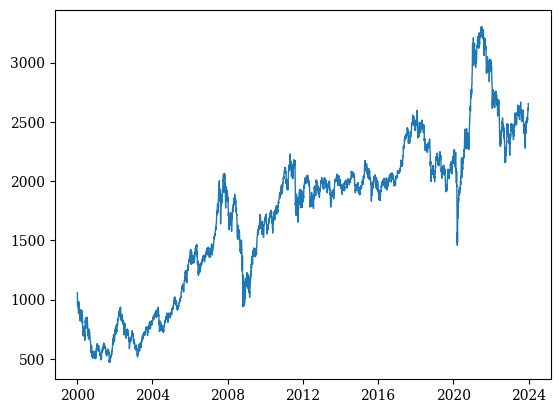

In [7]:
# 주가 차트 그려 봄
datag1=data1[['Adj Close']]
plt.plot(datag1, lw='1')

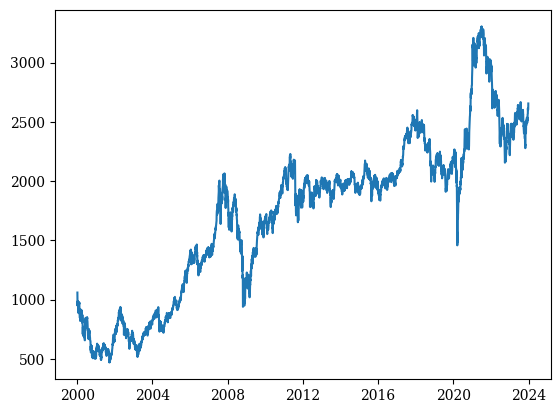

In [8]:
datag2=data2[['Close']]
plt.plot(datag2)

In [9]:
Kospi=data1

In [10]:
Kospi['Return']=np.log(Kospi['Adj Close']/Kospi['Adj Close'].shift(1))

In [11]:
Kospi.tail()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2023-12-21,2598.370117,2610.810059,2587.159912,2600.020020,2600.020020,578300,-0.005477
2023-12-22,2617.719971,2621.370117,2599.510010,2599.510010,2599.510010,466000,-0.000196
2023-12-26,2609.439941,2612.139893,2594.649902,2602.590088,2602.590088,439500,0.001184
2023-12-27,2599.350098,2613.500000,2590.080078,2613.500000,2613.500000,349700,0.004183
2023-12-28,2616.270020,2655.280029,2611.719971,2655.280029,2655.280029,460100,0.015860


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

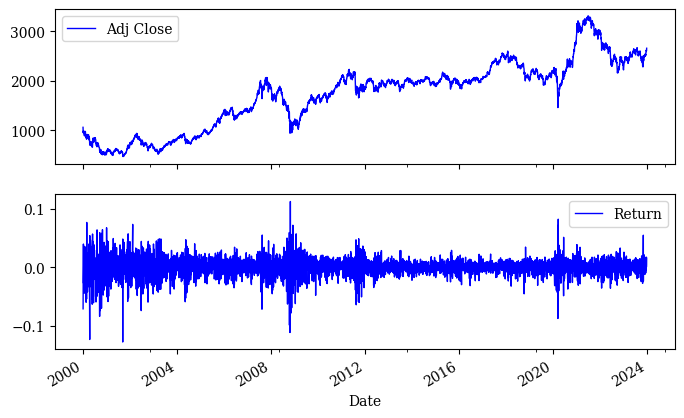

In [12]:
Kospi[['Adj Close','Return']].plot(subplots=True, style='b', lw='1', figsize=(8,5))

In [13]:
Kospi['40d']=Kospi['Adj Close'].rolling(window=40).mean()
Kospi['240d']=Kospi['Adj Close'].rolling(window=240).mean()

In [14]:
Kospi[['Adj Close', '40d', '240d']].tail()

,Adj Close,40d,240d
Date,,,
2023-12-21,2600.020020,2475.912512,2498.007252
2023-12-22,2599.510010,2483.330011,2499.594044
2023-12-26,2602.590088,2490.631012,2501.038253
2023-12-27,2613.500000,2499.018762,2502.491795
2023-12-28,2655.280029,2507.861761,2504.013920


<Axes: xlabel='Date'>

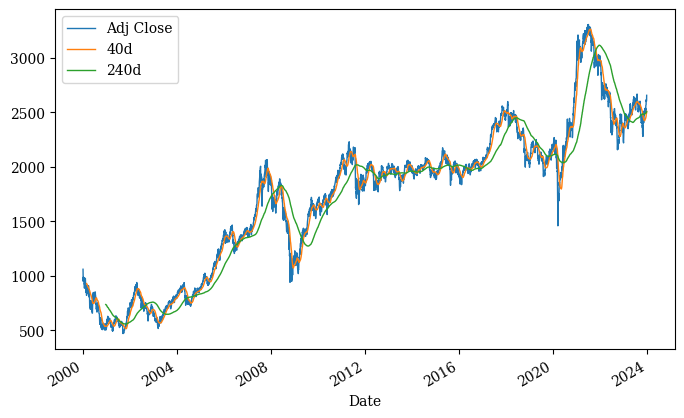

In [15]:
Kospi[['Adj Close', '40d', '240d']].plot(lw='1', figsize=(8,5))

In [16]:
Kospi['Mov_vol']=Kospi['Return'].rolling(window=245).std()*math.sqrt(245)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

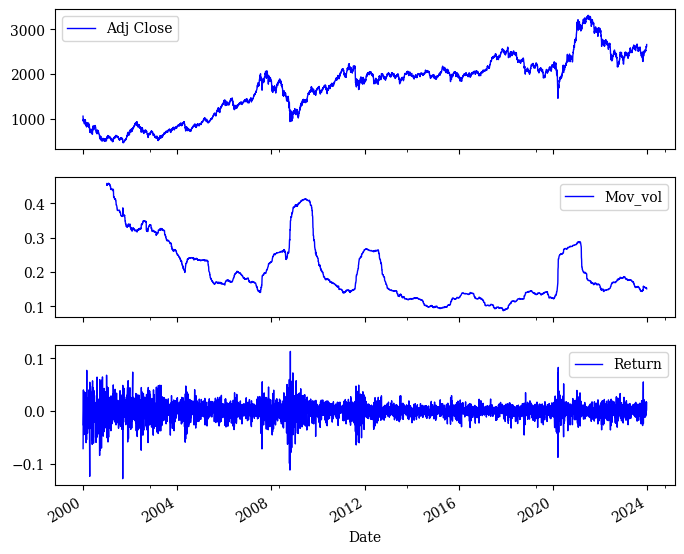

In [17]:
Kospi[['Adj Close','Mov_vol', 'Return']].plot(subplots=True, style='b', lw='1', figsize=(8,7))

### Major Stock Indices

In [18]:
kospi = yf.download('^KS11', start_date, end_date)
snp = yf.download('^GSPC',start_date, end_date) #S&P500
nikkei = yf.download('^N225',start_date, end_date) # Nikkei 225
euronext = yf.download('^N100',start_date, end_date) # EURONEXT 100

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [19]:
kospi.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,1028.329956,1066.180054,1016.590027,1059.040039,1059.040039,195900
2000-01-05,1006.869995,1026.520020,984.049988,986.309998,986.309998,257700
2000-01-06,1013.950012,1014.900024,953.500000,960.789978,960.789978,203500
2000-01-07,949.169983,970.159973,930.840027,948.650024,948.650024,215700
2000-01-10,979.669983,994.940002,974.820007,987.239990,987.239990,240200


In [20]:
# 지수 자료를 병합
eqt1 = pd.merge(snp['Adj Close'].to_frame(), kospi['Adj Close'].to_frame(),left_index=True, right_index=True, how='inner')
eqt1.columns=['SP500','KOSPI']

eqt2 = pd.merge(nikkei['Adj Close'].to_frame(), euronext['Adj Close'].to_frame(),left_index=True, right_index=True, how='inner')
eqt2.columns=['nikkei','euronext']

eqt3 = pd.merge(eqt1, eqt2,left_index=True, right_index=True, how='inner')

In [21]:
eqt3.head()

,SP500,KOSPI,nikkei,euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [22]:
rtn= ( np.log(eqt3) - np.log(eqt3.shift(1)) )*100
rtn.columns=['r_sp','r_kp','r_nk','r_ux']
rtn.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


In [23]:
eqt = pd.merge(eqt3,rtn,left_index=True, right_index=True, how='inner')
eqt.head()

,SP500,KOSPI,nikkei,euronext,r_sp,r_kp,r_nk,r_ux
Date,,,,,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971,NaN,NaN,NaN,NaN
2000-01-05,1402.109985,986.309998,18542.550781,930.260010,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,1403.449951,960.789978,18168.269531,922.460022,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,1441.469971,948.650024,18193.410156,943.880005,2.672995,-1.271589,0.138281,2.295501
2000-01-11,1438.560059,981.330017,18850.919922,954.059998,-0.202075,3.386886,3.550227,1.072752


In [24]:
pr = eqt[['SP500', 'KOSPI', 'nikkei','euronext']]
pr.head()

,SP500,KOSPI,nikkei,euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [25]:
rt = eqt[['r_sp','r_kp','r_nk','r_ux']]
rt.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


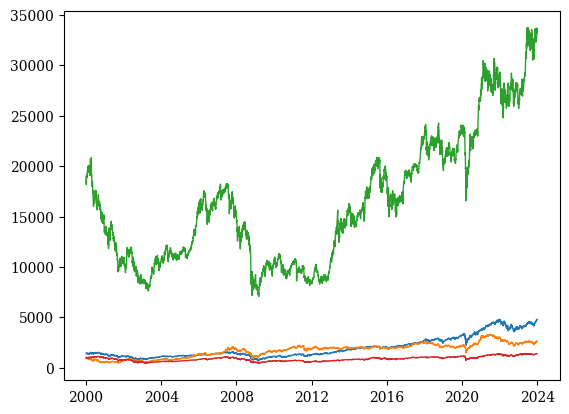

In [26]:
# 원 자료로 그림을 그려 봄
plt.plot(pr, lw='1')

In [27]:
# 초기시점을 0 으로 기준으로 잡고 상대 주가(relative stock price)를 표현
pr_0 = pr / pr.iloc[0] - 1.0

<Axes: xlabel='Date'>

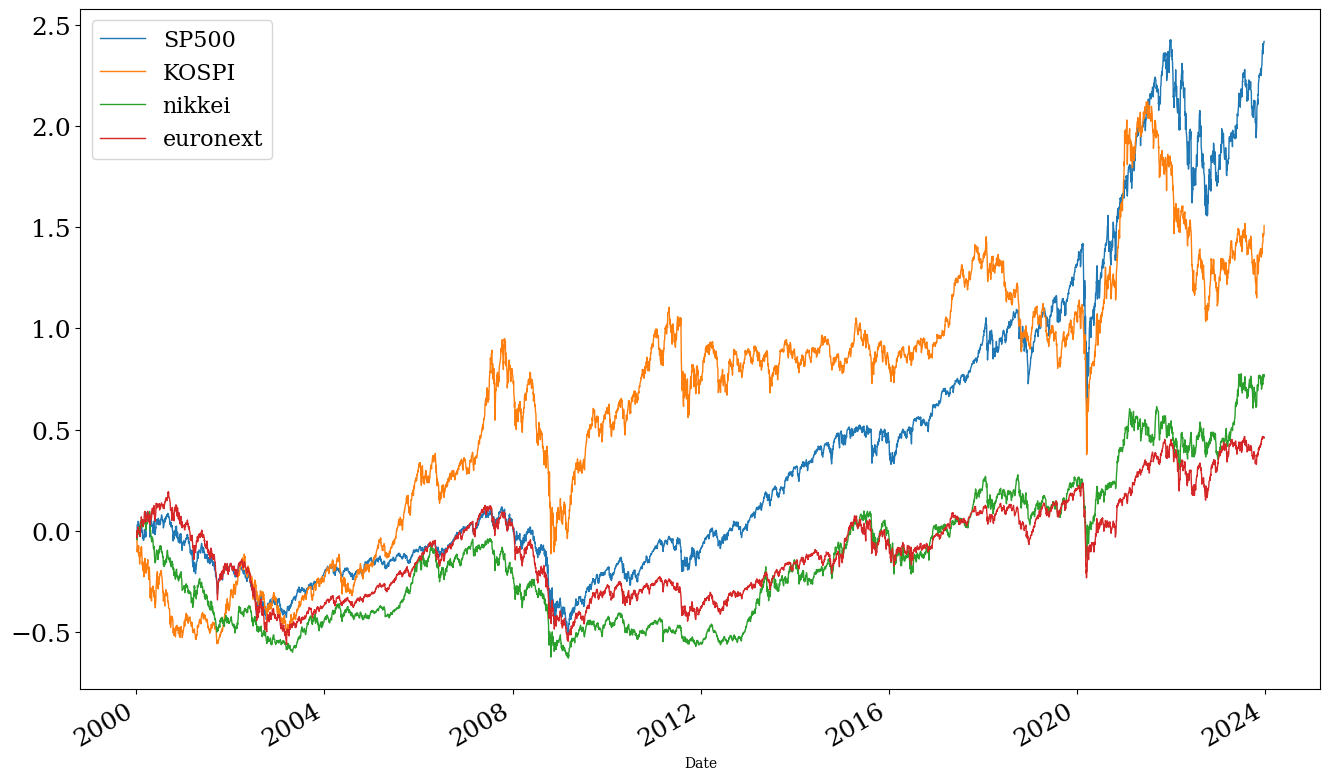

In [28]:
# 상대가격을 그래프로 표현
plt.rcParams['legend.fontsize'] = 16
pr_0.plot( figsize=(16,10), fontsize=18, lw='1')

<Axes: xlabel='Date'>

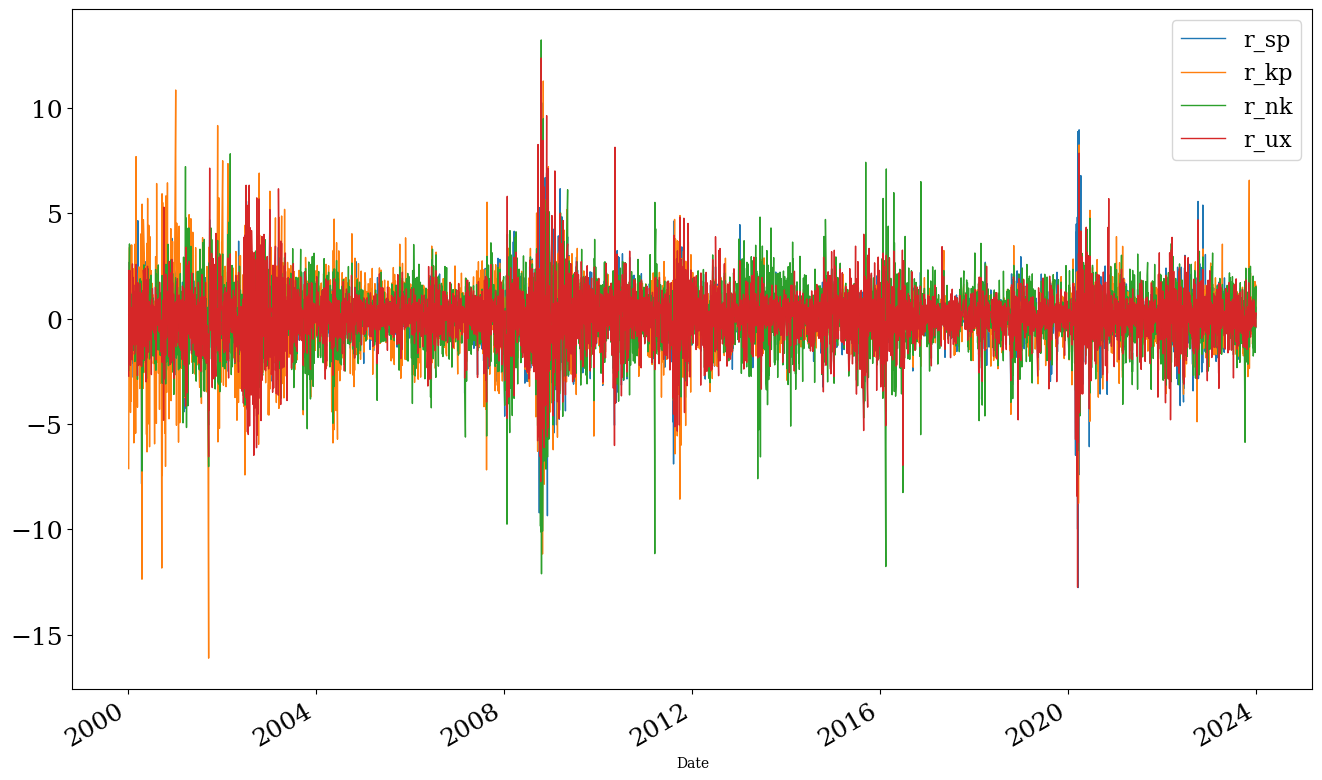

In [29]:
#  수익률 그래프도 표현
plt.rcParams['legend.fontsize'] = 16
rt.plot( figsize=(16,10), lw='1', fontsize=18)

In [30]:
pr.describe()

,SP500,KOSPI,nikkei,euronext
count,5393.000000,5393.000000,5393.000000,5393.000000
mean,1971.076262,1724.509723,16413.674552,872.111535
std,1062.609874,673.579294,6504.150334,226.647918
min,676.530029,468.760010,7054.979980,419.950012
25%,1191.290039,1162.229980,10687.809570,680.630005
50%,1454.979980,1915.530029,15449.629883,859.479980
75%,2582.300049,2120.330078,20563.160156,1026.420044
max,4793.540039,3305.209961,33753.328125,1401.800049


In [31]:
rt.describe()

,r_sp,r_kp,r_nk,r_ux
count,5392.000000,5392.000000,5392.000000,5392.000000
mean,0.022795,0.017047,0.010537,0.007007
std,1.295764,1.535269,1.526880,1.365667
min,-12.765220,-16.115370,-12.111020,-12.751740
25%,-0.503971,-0.628262,-0.736619,-0.612069
50%,0.067868,0.073312,0.052155,0.061688
75%,0.613988,0.757606,0.836603,0.668807
max,10.423562,11.284352,13.234592,12.378520


In [32]:
print(rt.describe())
print('skeness: ', rt.skew(axis=0))
print('kurtosis: ', rt.kurtosis(axis=0))
# print('autocorrelation: ', rt.autocorr(lag=1))

              r_sp         r_kp         r_nk         r_ux
count  5392.000000  5392.000000  5392.000000  5392.000000
mean      0.022795     0.017047     0.010537     0.007007
std       1.295764     1.535269     1.526880     1.365667
min     -12.765220   -16.115370   -12.111020   -12.751740
25%      -0.503971    -0.628262    -0.736619    -0.612069
50%       0.067868     0.073312     0.052155     0.061688
75%       0.613988     0.757606     0.836603     0.668807
max      10.423562    11.284352    13.234592    12.378520
skeness:  r_sp   -0.436852
r_kp   -0.584097
r_nk   -0.434695
r_ux   -0.132850
dtype: float64
kurtosis:  r_sp    9.799473
r_kp    9.053308
r_nk    6.493650
r_ux    7.267024
dtype: float64


In [33]:
# 우리가 원하는 통계량이 모두 포함된 기초통계표를 만들음
df=pr
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              SP500          KOSPI        nikkei      euronext
count  5.393000e+03    5393.000000  5.393000e+03   5393.000000
mean   1.971076e+03    1724.509723  1.641367e+04    872.111535
std    1.062610e+03     673.579294  6.504150e+03    226.647918
min    6.765300e+02     468.760010  7.054980e+03    419.950012
25%    1.191290e+03    1162.229980  1.068781e+04    680.630005
50%    1.454980e+03    1915.530029  1.544963e+04    859.479980
75%    2.582300e+03    2120.330078  2.056316e+04   1026.420044
max    4.793540e+03    3305.209961  3.375333e+04   1401.800049
var    1.129140e+06  453709.065207  4.230397e+07  51369.278860
skew   1.130000e+00      -0.149710  7.089439e-01      0.360164
kurt   1.018859e-01      -0.706118 -4.119402e-01     -0.632537


In [34]:
df=rt
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              r_sp         r_kp         r_nk         r_ux
count  5392.000000  5392.000000  5392.000000  5392.000000
mean      0.022795     0.017047     0.010537     0.007007
std       1.295764     1.535269     1.526880     1.365667
min     -12.765220   -16.115370   -12.111020   -12.751740
25%      -0.503971    -0.628262    -0.736619    -0.612069
50%       0.067868     0.073312     0.052155     0.061688
75%       0.613988     0.757606     0.836603     0.668807
max      10.423562    11.284352    13.234592    12.378520
var       1.679003     2.357051     2.331362     1.865046
skew     -0.436852    -0.584097    -0.434695    -0.132850
kurt      9.799473     9.053308     6.493650     7.267024


In [35]:
pr.corr()

,SP500,KOSPI,nikkei,euronext
SP500,1.000000,0.797461,0.945977,0.869469
KOSPI,0.797461,1.000000,0.710618,0.625685
nikkei,0.945977,0.710618,1.000000,0.943734
euronext,0.869469,0.625685,0.943734,1.000000


In [36]:
rt.corr()

,r_sp,r_kp,r_nk,r_ux
r_sp,1.000000,0.231427,0.202946,0.605414
r_kp,0.231427,1.000000,0.609048,0.374686
r_nk,0.202946,0.609048,1.000000,0.400244
r_ux,0.605414,0.374686,0.400244,1.000000


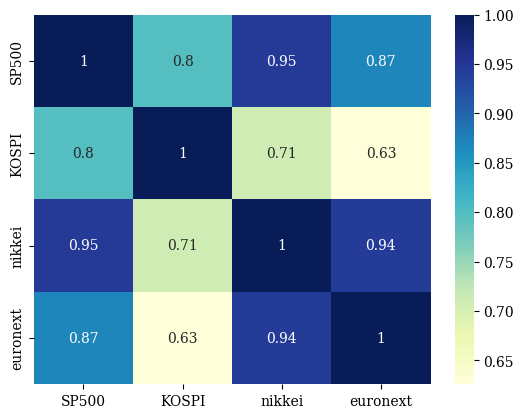

In [37]:
sns.heatmap(pr.corr(), annot=True, cmap="YlGnBu")
plt.show()

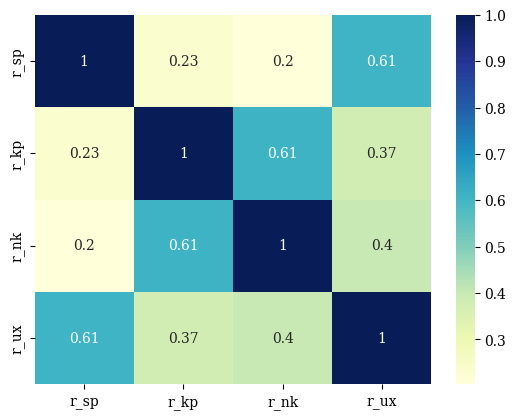

In [38]:
sns.heatmap(rt.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Regression Analysis

### The Data

In [39]:
snp = yf.download('^GSPC',start_date, end_date) #S&P500 지수
vix = yf.download('^vix',start_date, end_date) #VIX 지수

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [40]:
data = pd.merge(snp['Adj Close'].to_frame(), vix['Adj Close'].to_frame(),left_index=True, right_index=True, how='inner')
data.columns=['SP500','VIX']

In [41]:
data.tail()

,SP500,VIX
Date,,
2023-12-22,4754.629883,13.03
2023-12-26,4774.750000,12.99
2023-12-27,4781.580078,12.43
2023-12-28,4783.350098,12.47
2023-12-29,4769.830078,12.45


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

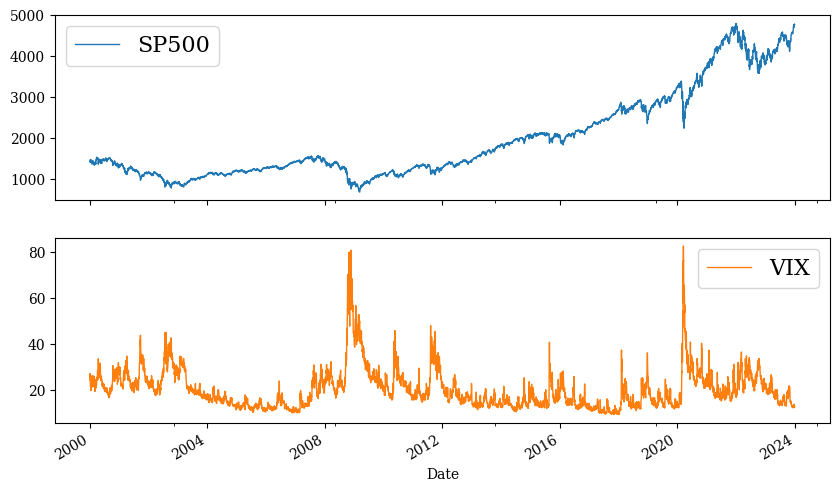

In [42]:
data.plot(subplots=True, figsize=(10, 6), lw='1')

<Axes: xlabel='Date'>

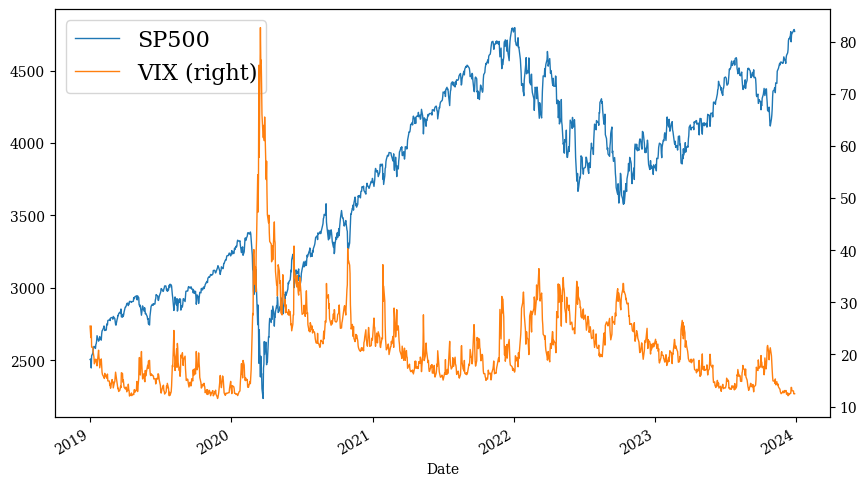

In [43]:
data.loc['2018-12-31':].plot(secondary_y='VIX', figsize=(10, 6), lw='1')

### Log Returns

In [44]:
rets = np.log(data / data.shift(1))

In [45]:
rets.head()

,SP500,VIX
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.039099,0.109441
2000-01-05,0.001920,-0.022464
2000-01-06,0.000955,-0.026085
2000-01-07,0.026730,-0.169424


In [46]:
rets.dropna(inplace=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

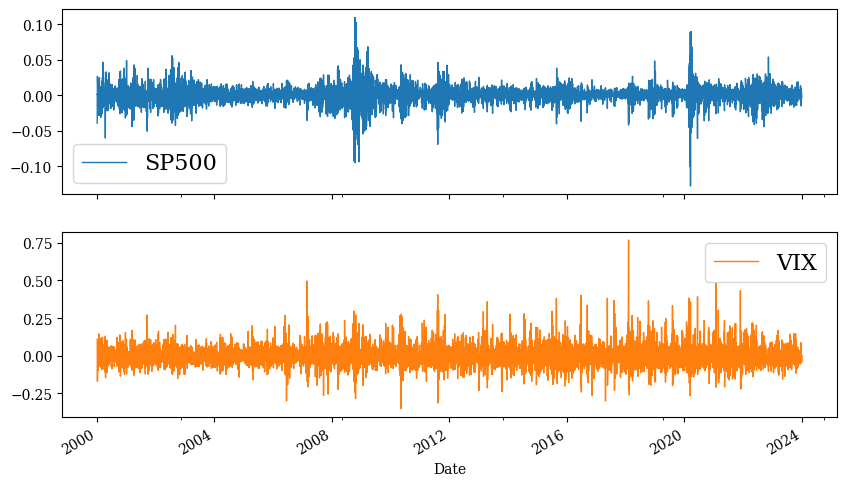

In [47]:
rets.plot(subplots=True, figsize=(10, 6), lw='1')

array([[<Axes: xlabel='SP500', ylabel='SP500'>,
        <Axes: xlabel='VIX', ylabel='SP500'>],
       [<Axes: xlabel='SP500', ylabel='VIX'>,
        <Axes: xlabel='VIX', ylabel='VIX'>]], dtype=object)

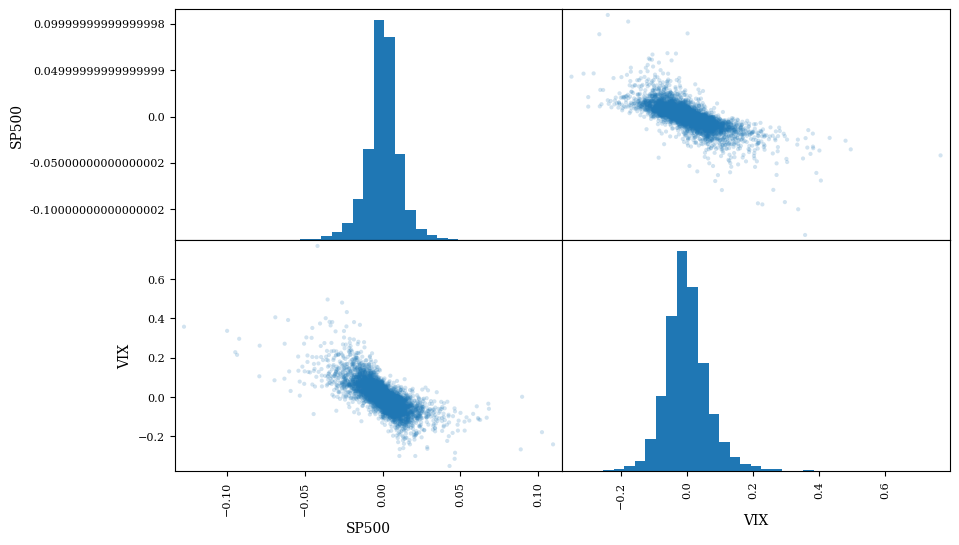

In [48]:
pd.plotting.scatter_matrix(rets,
                           alpha=0.2,
                           diagonal='hist',
                           hist_kwds={'bins': 35},
                           figsize=(10, 6))

### OLS Regression

In [49]:
reg = np.polyfit(rets['SP500'], rets['VIX'], deg=1)

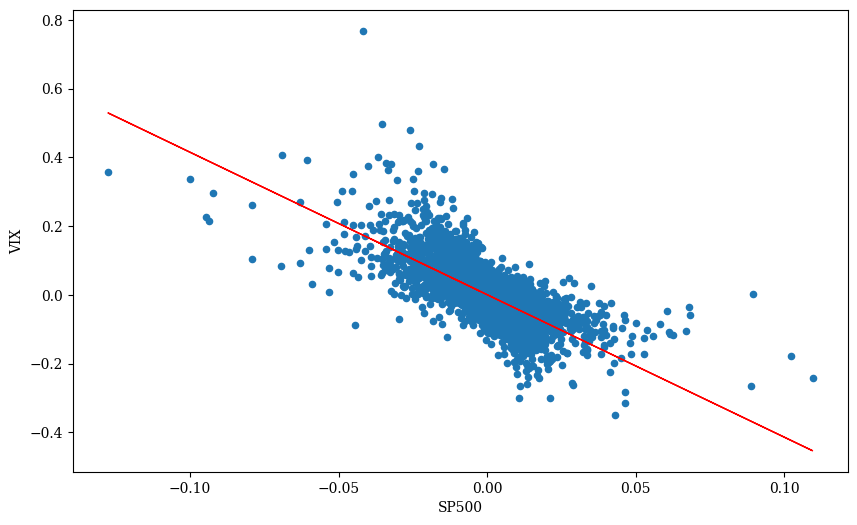

In [50]:
ax = rets.plot(kind='scatter', x='SP500', y='VIX', figsize=(10, 6))
ax.plot(rets['SP500'], np.polyval(reg, rets['SP500']), 'r', lw='1')

### Correlation

In [51]:
rets.corr()

,SP500,VIX
SP500,1.000000,-0.728591
VIX,-0.728591,1.000000


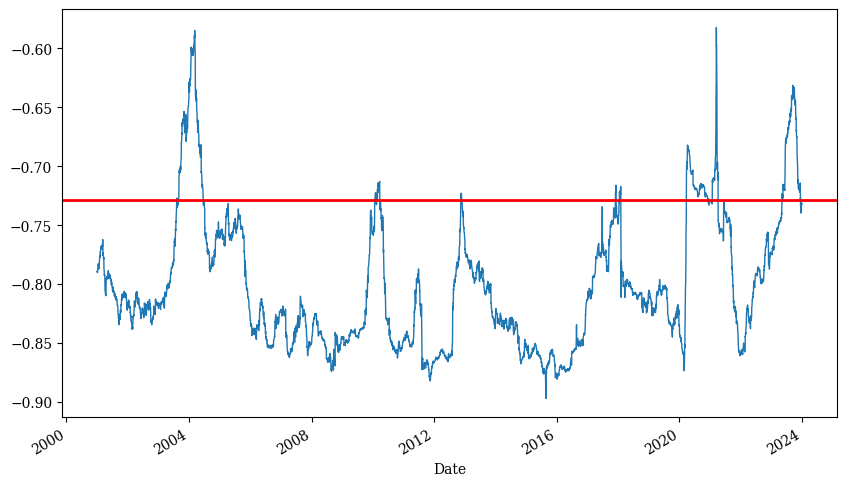

In [52]:
ax = rets['SP500'].rolling(window=252).corr(
                  rets['VIX']).plot(figsize=(10, 6),lw='1')
ax.axhline(rets.corr().iloc[0, 1], c='r', lw='2')